In [4]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [5]:
train_set = pd.read_csv(r"c:\Users\Siddharth Sharma\OneDrive\Desktop\UnRar\titanic\train.csv")
print(list(train_set.columns))
print(train_set)


['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             A

In [6]:
test_set = pd.read_csv(r"c:\Users\Siddharth Sharma\OneDrive\Desktop\UnRar\titanic\test.csv")
print(test_set.columns)
print(test_set)

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
     PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                     

Pclass
3    218
1    107
2     93
Name: count, dtype: int64


<Axes: xlabel='Pclass'>

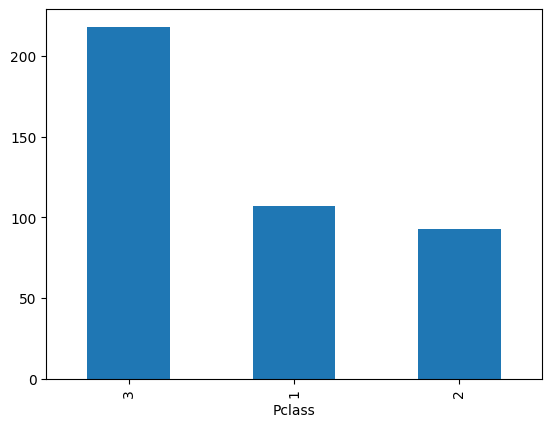

In [ ]:
frequency_by_class=test_set['Pclass'].value_counts()
print(frequency_by_class)
frequency_by_class.plot(kind = 'bar')


Survived
0    549
1    342
Name: count, dtype: int64


<Axes: xlabel='Survived'>

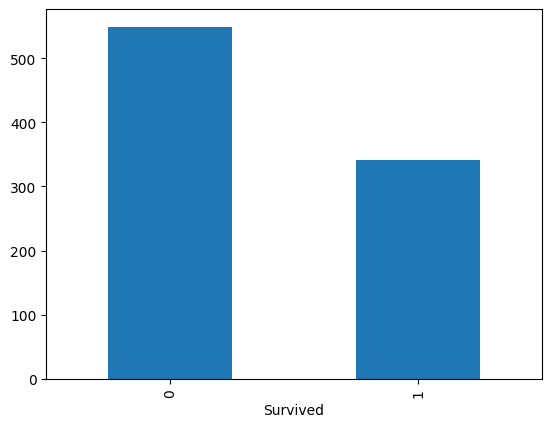

In [ ]:
no_of_survived = train_set['Survived'].value_counts()#groups the values into groups of 2 ( 0 or 1) like GROUPBY sql funtion
print(no_of_survived)
no_of_survived.plot(kind = 'bar')

Sex
male      577
female    314
Name: count, dtype: int64


<Axes: xlabel='Sex'>

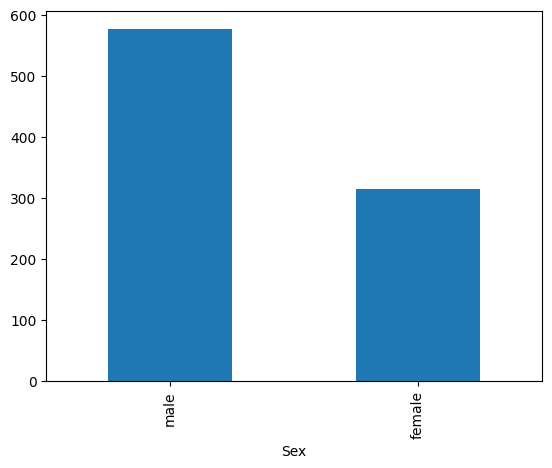

In [9]:
sex_division= train_set['Sex'].value_counts()
print(sex_division)
sex_division.plot(kind = 'bar')

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
dtype: int64


<Axes: xlabel='Sex,Survived'>

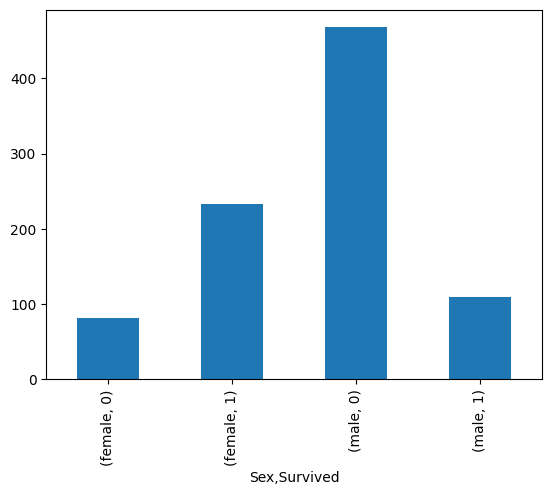

In [10]:
survival_by_gender = train_set.groupby(['Sex', 'Survived']).size()
print(survival_by_gender)
survival_by_gender.plot(kind = 'bar')

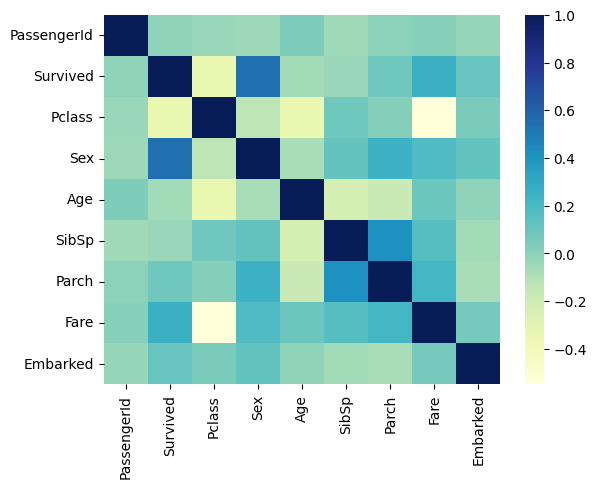

In [24]:
import seaborn as sns
data_with_numbers = train_set.select_dtypes(include = ['number'])
#sns.heatmap(train_set.corr() , cmap="YlGnBu")
sns.heatmap(data_with_numbers.corr() , cmap = "YlGnBu")

plt.show()

In [15]:
train_set.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,29.361582,0.523008,0.381594,32.204208,0.361392
std,257.353842,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429,0.635673
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


In [12]:
train_set['Age'] = train_set['Age'].fillna(train_set['Age'].median())
test_set['Age'] = test_set['Age'].fillna(test_set['Age'].median())

train_set['Embarked'] = train_set['Embarked'].fillna(train_set['Embarked'].mode()[0])
test_set['Embarked'] = test_set['Embarked'].fillna(test_set['Embarked'].mode()[0])

test_set['Fare'] = test_set['Fare'].fillna(test_set['Fare'].median())


In [13]:
train_set['Sex'] = train_set['Sex'].map({'male': 0, 'female': 1})
test_set['Sex'] = test_set['Sex'].map({'male': 0, 'female': 1})

train_set['Embarked'] = train_set['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
test_set['Embarked'] = test_set['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [14]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = train_set[features]
y = train_set['Survived']